In [2]:
import analysis_utils as au
from astropy.visualization import AsinhStretch
from qdisk.classes import FitsImage
from qdisk.plot import Map
from eDisk_source_dict import source_dict
import matplotlib.pyplot as plt
import eDiskplot as eplot
from matplotlib import ticker
from matplotlib import patches
import numpy as np

%matplotlib widget
%load_ext autoreload
%autoreload 2

############ MANUALLY SET #################
source = "L1489IRS"
config = "SBLB"
imtype = "continuum"
robust = 1.0
center_coord = source_dict[source]["radec"]
distance = source_dict[source]["distance"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
zoomed = False
imagename = au.imageproductpath + au.get_image_basename(
    source, config, imtype, robust=robust, type="pbcor"
)
###########################################

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# measure rms
image = FitsImage(au.imageproductpath + au.get_image_basename(source, config, imtype, robust=robust, type="image"))
image.estimate_rms(rmin=5)
image.rms

1.4487963e-05

In [33]:
(0.23-0.18)/image.rms/1e3

3.4511407375563774

In [22]:
image.beam
beam_Ohashi22 = (0.240, 0.158)
np.multiply(*image.beam[:2]) / np.multiply(*beam_Ohashi22), image.beam

(0.15061929166739813, (0.093071602284912, 0.061366554349668, 20.43847846985))

/tmp/ipykernel_1691052/2715455130.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


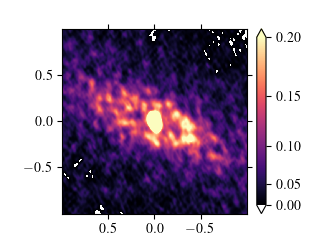

In [30]:
from astropy.visualization import ImageNormalize, LogStretch, PowerStretch
fig, ax = plt.subplots()

contmap = Map(imagename, ax=ax, data_scaling_factor=1e3, center_coord=center_coord, xlim=(-1, 1), ylim=(-1, 1))
contmap.plot_colormap(cmap="magma", vmin=0.0, vmax=1.0*0.2, stretch=PowerStretch(a=1.5))
contmap.add_colorbar()

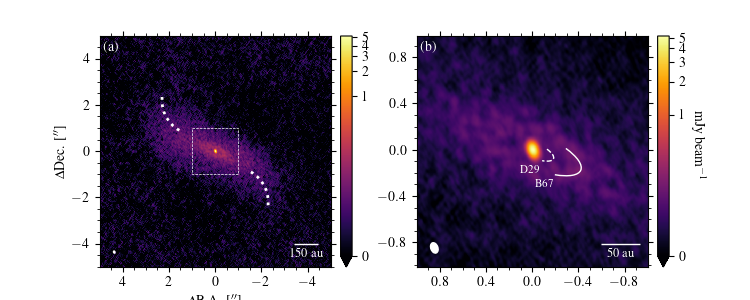

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))

plot_type = ["wide", "zoom"]
lim = {"wide": (-5, 5), "zoom": (-1, 1)}
a = {"wide": 0.005, "zoom": 0.02}
scale = {"wide": 150, "zoom": 50}

ring_pos = 0.456
gap_pos = 0.2

for i, (pt, ax) in enumerate(zip(plot_type, axes)):

    contmap = Map(
        imagename,
        ax=ax,
        data_scaling_factor=1e3,
        center_coord=center_coord,
        xlim=lim[pt],
        ylim=lim[pt],
    )
    contmap.plot_colormap(cmap="inferno", vmin=0.0, stretch=AsinhStretch(a=a[pt]))
    contmap.add_beam()
    contmap.add_colorbar(label="mJy beam$^{-1}$" if i == 1 else None, labelpad=15)
    contmap.add_scalebar(scale=scale[pt] / distance, text="{:d} au".format(scale[pt]))
    contmap.set_ticker(minor=True, majornticks=5, minornticks=5)

    if i == 0:
        contmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)
        box = patches.Rectangle(
            xy=(-1, -1),
            width=2,
            height=2,
            fill=False,
            ls="dashed",
            color="white",
            lw=0.5,
        )
        arc1 = patches.Arc(
            xy=(-0.8, -2.2),
            width=3,
            height=3,
            theta1=120,
            theta2=190,
            color="white",
            ls="dotted",
            lw=2,
        )
        arc2 = patches.Arc(
            xy=(0.8, 2.2),
            width=3,
            height=3,
            theta1=120 + 180,
            theta2=190 + 180,
            color="white",
            ls="dotted",
            lw=2,
        )
        contmap.ax.add_artist(box)
        contmap.ax.add_artist(arc1)
        contmap.ax.add_artist(arc2)

        contmap.ax.annotate(text="(a)", xy=(0.05, 0.95), xycoords="axes fraction", color="white", ha="center", va="center")

        # contmap.ax.scatter(0, 0, marker="+", s=100, color="white", linewidth=0.5)

    if i == 1:
        arc_ring = patches.Arc(
            xy=(0, 0),
            width=2 * ring_pos,
            height=2 * ring_pos * np.cos(np.radians(incl)),
            angle=90 - PA,
            color="white",
            theta1=155,
            theta2=205,
        )
        contmap.ax.annotate(text="B{:.0f}".format(ring_pos*distance), xy=(-0.1, -0.3), color="white", ha="center", va="center", size=8)
        arc_gap = patches.Arc(
            xy=(0, 0),
            width=2 * gap_pos,
            height=2 * gap_pos * np.cos(np.radians(incl)),
            angle=90 - PA,
            color="white",
            theta1=155,
            theta2=205,
            ls="dashed",
        )
        contmap.ax.annotate(text="D{:.0f}".format(gap_pos*distance), xy=(0.02, -0.18), color="white", ha="center", va="center", size=8)
        contmap.ax.add_artist(arc_ring)
        contmap.ax.add_artist(arc_gap)

        contmap.ax.annotate(text="(b)", xy=(0.05, 0.95), xycoords="axes fraction", color="white", ha="center", va="center")


In [153]:
fig.savefig("./figure/L1489IRS_SBLB_continuum_robust_1.0.pbcor_annotated.png", dpi=800, bbox_inches="tight", pad_inches=0.01)

In [11]:
contmap.restore_original_cube()
contmap.estimate_rms(rmin=5.0, PA=0.0)
contmap.rms

2.015433e-05

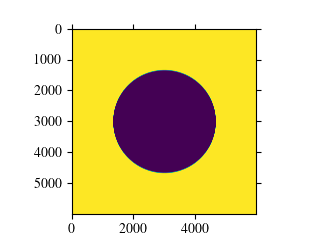

In [12]:
plt.figure()
plt.imshow(contmap.mask)